## AMSC 661, Homework 6
#### Dominic Flocco, March 15, 2023

In [1]:
import scipy as sc
import numpy as np 
import matplotlib.pyplot as plt

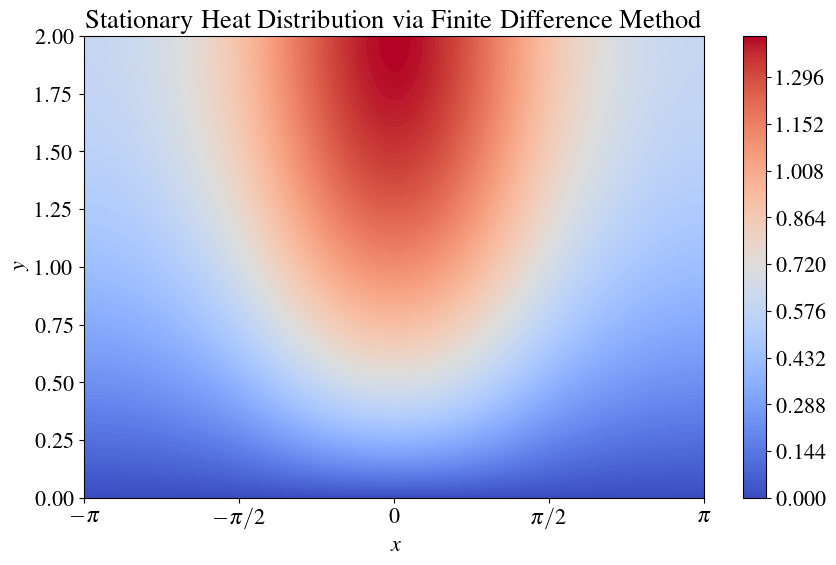

In [2]:
# RHS function
def f(x):
    if x >= -np.pi/2 and x <= np.pi/2:
        return - np.cos(x)
    else: 
        return 0

hx = np.pi/256 # x-step
hy = 1/100 # y-step

# Define mesh size
nx = int(2*np.pi/hx) 
ny = int(2/hy) 
n = nx*(ny)

# Define mesh points
x = np.linspace(-np.pi, np.pi - hx, nx)
y = np.linspace(hy, 2, ny)

# Defiine matrix A
Ix, Iy = sc.sparse.identity(nx), sc.sparse.identity(ny)
ex, ey = np.ones(nx), np.ones(ny)
e_aux = np.ones(ny)
e_aux[0] = 2
xdiags, ydiags = np.array([ex, ex, -2*ex, ex, ex]), np.array([ey, -2*ey, e_aux])
Tx = (1/(hx**2))*sc.sparse.diags(xdiags, [-nx+1, -1, 0, 1, nx-1], (nx, nx))
Ty = (1/(hx**2))*sc.sparse.diags(ydiags, [-1,0,1], (ny,ny))
A = sc.sparse.kron(Tx, Iy) + sc.sparse.kron(Ix, Ty)

# Define RHS
f_hat = np.array([f(i) for i in x])
rhs = sc.sparse.kron(f_hat, ey).T

# Solve linear algebraic system
u = sc.sparse.linalg.spsolve(A, rhs)
sol = np.reshape(u, (ny, nx), order='F') # resize 

# Insert bottom and periodic x boundary conditions
aux = np.reshape(sol[:,0], (ny, 1))
sol = np.append(sol, aux, axis = 1)
sol = np.append(sol, np.zeros((1, nx+1)), axis=0)

# Plot solution
plt.rcParams.update({
        "font.family": "Times", 
        "text.usetex": True,
        "font.size": 16
    })

pi = np.pi
x = np.linspace(-np.pi, np.pi, nx+1)
y = np.linspace(0, 2, ny+1)
ax =plt.figure(figsize=(10,6))
contour = plt.contourf(x,np. flip(y), sol, levels=200, cmap='coolwarm', origin='upper')
plt.xlabel("$x$")
plt.xticks([-pi, -pi/2, 0, pi/2, pi], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
plt.ylabel("$y$") 
plt.colorbar(contour)
plt.title("Stationary Heat Distribution via Finite Difference Method")
plt.show()
